In [21]:
# dbscan klasterovanje na dogs skupu 

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [6]:
# uciavamo podatke i radimo normalizaciju, sve isto kao u proslom primeru
df = pd.read_csv('../dogs.csv')
#df.head()

feature_names = df.columns[1:].tolist()
X = df[feature_names]

X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)

print(X)

      height    weight
0   0.538462  0.248366
1   0.384615  0.084967
2   0.461538  0.183007
3   0.807692  0.738562
4   0.076923  0.006536
5   0.730769  0.464052
6   0.653846  0.411765
7   1.000000  1.000000
8   0.576923  0.281046
9   0.500000  0.379085
10  0.000000  0.000000


In [18]:
# min_samples je broj instanci koje moraju da postoje oko tacke da bi ona bila centar klastera (?)
# eps je neka maksimalna razdaljina, za to moramo da isprobamo razlicite vrednosti, ovaj parametar je 
# bitniji da se dobro pogodi nego min_samples
model = DBSCAN(eps=0.3, min_samples=2)
model.fit(X)

DBSCAN(eps=0.3, min_samples=2)

In [20]:
# podrazumevano eps=0.5, primetimo da ako pozovemo samo DBSCAN() bez da menjamo bilo koji parametar, 
# svi labeli ce biti isti, tj sve ce biti u jednom klasteru
# ono sto se proceni da je sum ce biti oznaceno sa -1. Mi kada smo probali eps=0.1 ispalo je da se svi
# podaci sum, znaci uzeli smo premalo eps
# sa eps=0.3 smo vec dobili neke klastere i neke sumove
print(model.labels_)

[ 0  0  0  0  1  0  0 -1  0  0  1]


In [23]:
# u metrics iamo i silhouette score, zaboravio je da pokaze to prosli cas
print(silhouette_score(X, model.labels_))

0.4306542372423945


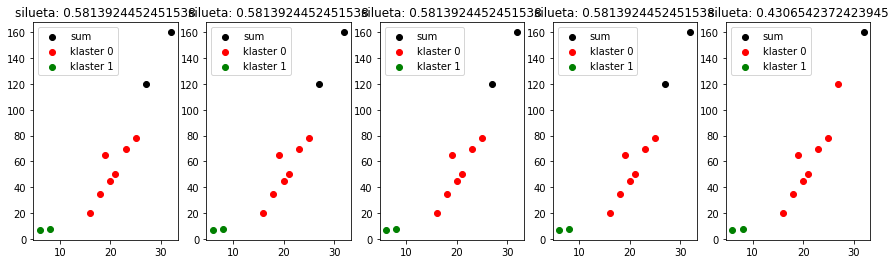

In [32]:
# mozemo u nekoj petlji da probamo razlicite vrednosti za eps i da vidimo kako se ponasa
# prekopirali smo crtanje iz proslog primera uz malu izmenu
eps_values = [0.2, 0.225, 0.25, 0.275, 0.3]

colors = ['red', 'green', 'blue']
fig = plt.figure(figsize=(15, 4))

for i, eps in enumerate(eps_values):
    model = DBSCAN(eps=eps, min_samples=2)
    model.fit(X)
    
    df['label'] = model.labels_
     
    n_clusters = max(model.labels_) + 1
    
    fig.add_subplot(1, len(eps_values), i + 1)
       
    for cluster_label in range(-1, n_clusters):
        cluster = df[df['label'] == cluster_label]
        
        # ako je sum, onda je label -1, samo cemo njih da crtamo crnom bojom
        if cluster_label == -1:
            plt.scatter(cluster['height'], cluster['weight'],
                        marker='o', color='black', label='sum')
        else:
            plt.scatter(cluster['height'], cluster['weight'],
                        marker='o', color=colors[cluster_label], label=f'klaster {cluster_label}')
    
    plt.title(f'silueta: {silhouette_score(X, model.labels_)}')
    plt.legend(loc='best')
plt.show()